In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_h1_resort = pd.read_csv('./dataset/H1.csv') # Resort Hotel
df_h2_city = pd.read_csv('./dataset/H2.csv') # City Hotel

# Initial data exploration
print("H1 Dataset Shape: ", df_h1_resort.shape)
print("H2 Dataset Shape: ", df_h2_city.shape)

df_h1_resort['Hotel'] = 'H1'
df_h2_city['Hotel'] = 'H2'
df = pd.concat([df_h1_resort, df_h2_city])
print("Combined Dataset Shape: ", df.shape)
df.head()

H1 Dataset Shape:  (40060, 31)
H2 Dataset Shape:  (79330, 31)
Combined Dataset Shape:  (119390, 32)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1
1,0,737,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01,H1
2,0,7,2015,July,27,1,0,1,1,0.0,...,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1
3,0,13,2015,July,27,1,0,1,1,0.0,...,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02,H1
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03,H1


In [2]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# Data Cleaning

In [3]:
nan_replacements = {"Children:": 0.0,"Country": "Unknown", "Agent": 0, "Company": 0}
df = df.fillna(nan_replacements)
df_h1_resort = df_h1_resort.fillna(nan_replacements)
df_h2_city = df_h2_city.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
df["Meal"].replace("Undefined", "SC", inplace=True)
df_h1_resort["Meal"].replace("Undefined", "SC", inplace=True)
df_h2_city["Meal"].replace("Undefined", "SC", inplace=True)

# I'm dropping these entries with no guests.
zero_guests = list(df.loc[df["Adults"] + df["Children"] + df["Babies"]==0].index)
df.drop(df.index[zero_guests], inplace=True)

zero_guests_h1 = list(df_h1_resort.loc[df_h1_resort["Adults"] + df_h1_resort["Children"] + df_h1_resort["Babies"]==0].index)
df_h1_resort.drop(df_h1_resort.index[zero_guests_h1], inplace=True)

zero_guests_h2 = list(df_h2_city.loc[df_h2_city["Adults"] + df_h2_city["Children"] + df_h2_city["Babies"]==0].index)
df_h2_city.drop(df_h2_city.index[zero_guests_h2], inplace=True)

/var/folders/cr/n708zkvn3yl95rky5npx_kzw0000gn/T/ipykernel_93784/114634847.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Meal"].replace("Undefined", "SC", inplace=True)
/var/folders/cr/n708zkvn3yl95rky5npx_kzw0000gn/T/ipykernel_93784/114634847.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

# Bookings Cancellations Analysis

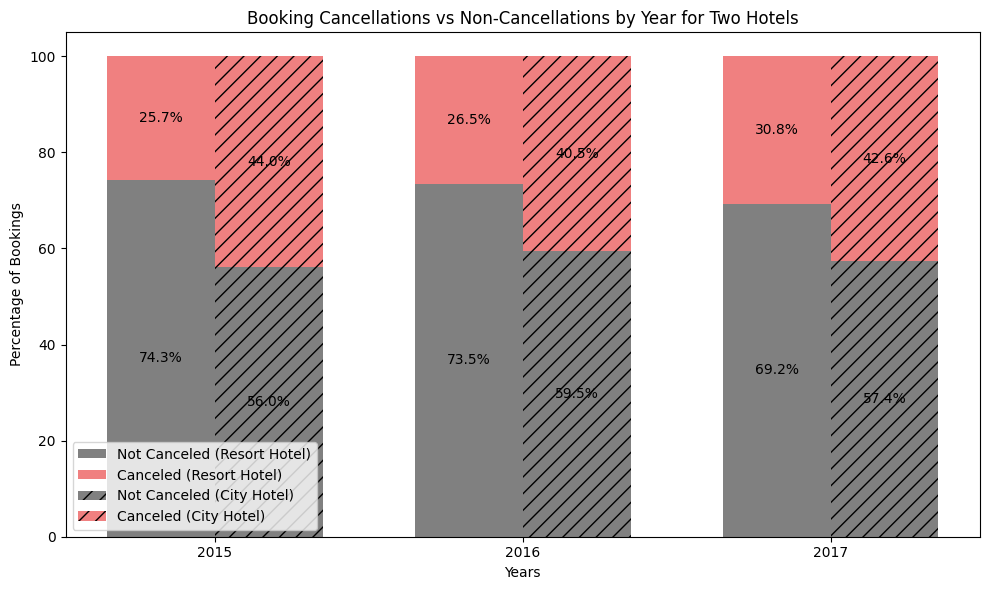

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Grouping the data by year and cancellation status
hotel1_cancel_data = df_h1_resort.groupby(['ArrivalDateYear', 'IsCanceled']).size().unstack(fill_value=0)
hotel2_cancel_data = df_h2_city.groupby(['ArrivalDateYear', 'IsCanceled']).size().unstack(fill_value=0)

# Calculate percentages for Resort Hotel
hotel1_cancel_data_percent = hotel1_cancel_data.div(hotel1_cancel_data.sum(axis=1), axis=0) * 100
# Calculate percentages for City Hotel
hotel2_cancel_data_percent = hotel2_cancel_data.div(hotel2_cancel_data.sum(axis=1), axis=0) * 100

# Define the years
years = hotel1_cancel_data.index

# Stacked bar plot
bar_width = 0.35  # Width of the bars
index = np.arange(len(years))  # The position of the bars on the x-axis

fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Resort Hotel
bar1 = ax.bar(index, hotel1_cancel_data_percent[0], bar_width, label='Not Canceled (Resort Hotel)', color='gray')
bar2 = ax.bar(index, hotel1_cancel_data_percent[1], bar_width, bottom=hotel1_cancel_data_percent[0], label='Canceled (Resort Hotel)', color='lightcoral')

# Plot for City Hotel
bar3 = ax.bar(index + bar_width, hotel2_cancel_data_percent[0], bar_width, label='Not Canceled (City Hotel)', color='gray', hatch='//')
bar4 = ax.bar(index + bar_width, hotel2_cancel_data_percent[1], bar_width, bottom=hotel2_cancel_data_percent[0], label='Canceled (City Hotel)', color='lightcoral', hatch='//')

# Add labels, title, and format
ax.set_xlabel('Years')
ax.set_ylabel('Percentage of Bookings')
ax.set_title('Booking Cancellations vs Non-Cancellations by Year for Two Hotels')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()

# Annotate percentages for Resort Hotel
for i in range(len(years)):
    ax.text(i, hotel1_cancel_data_percent.loc[years[i], 0] / 2, f'{hotel1_cancel_data_percent.loc[years[i], 0]:.1f}%', ha='center', va='center', color='black')
    ax.text(i, hotel1_cancel_data_percent.loc[years[i], 0] + hotel1_cancel_data_percent.loc[years[i], 1] / 2, f'{hotel1_cancel_data_percent.loc[years[i], 1]:.1f}%', ha='center', va='center', color='black')

# Annotate percentages for City Hotel
for i in range(len(years)):
    ax.text(i + bar_width, hotel2_cancel_data_percent.loc[years[i], 0] / 2, f'{hotel2_cancel_data_percent.loc[years[i], 0]:.1f}%', ha='center', va='center', color='black')
    ax.text(i + bar_width, hotel2_cancel_data_percent.loc[years[i], 0] + hotel2_cancel_data_percent.loc[years[i], 1] / 2, f'{hotel2_cancel_data_percent.loc[years[i], 1]:.1f}%', ha='center', va='center', color='black')

# Display the plot
plt.tight_layout()
plt.show()


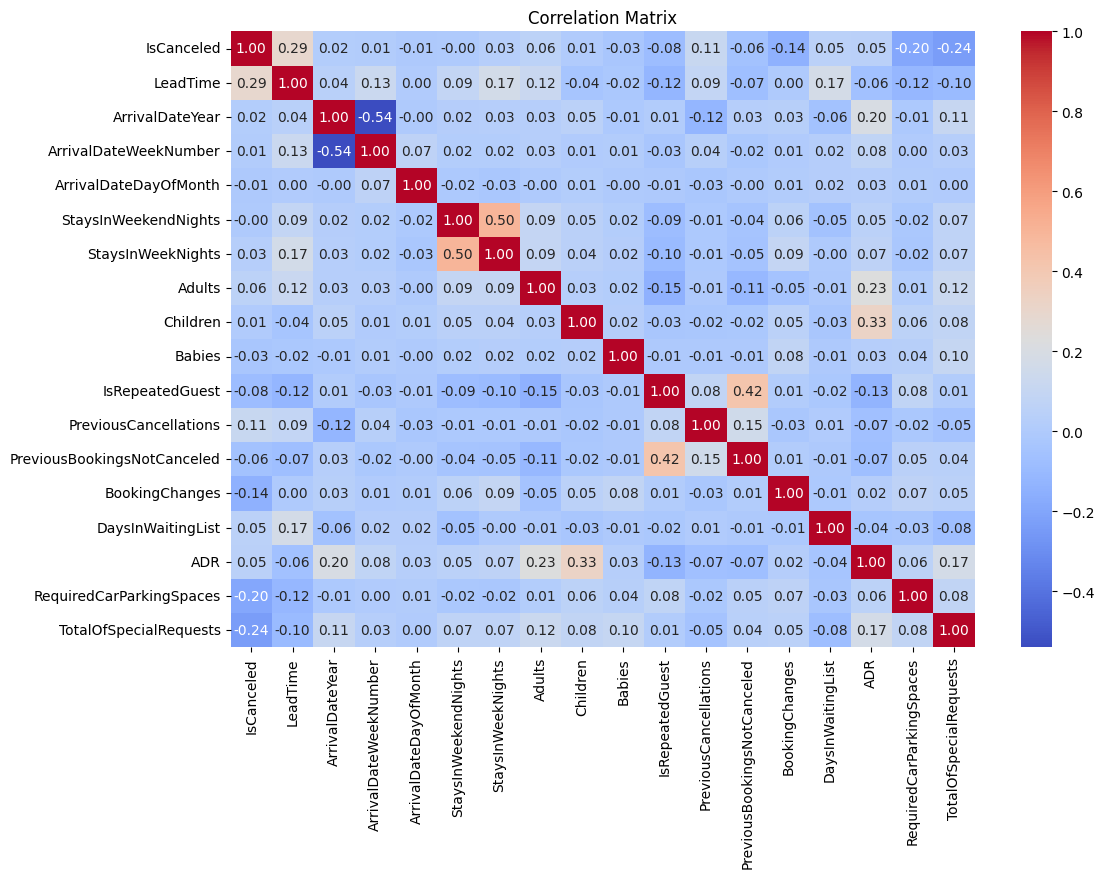

In [5]:
# Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number])

# Correlation Matrix for H1
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
correlation = numeric_cols.corr()['IsCanceled'].abs().sort_values(ascending = False)
correlation

IsCanceled                     1.000000
LeadTime                       0.292866
TotalOfSpecialRequests         0.235089
RequiredCarParkingSpaces       0.195347
BookingChanges                 0.144490
PreviousCancellations          0.110233
IsRepeatedGuest                0.084547
Adults                         0.060211
PreviousBookingsNotCanceled    0.057184
DaysInWaitingList              0.054338
ADR                            0.047776
Babies                         0.032336
StaysInWeekNights              0.025200
ArrivalDateYear                0.015764
ArrivalDateWeekNumber          0.008308
ArrivalDateDayOfMonth          0.005633
Children                       0.005231
StaysInWeekendNights           0.001596
Name: IsCanceled, dtype: float64

/var/folders/cr/n708zkvn3yl95rky5npx_kzw0000gn/T/ipykernel_93784/1391602987.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel1_canceled['ArrivalDate'] = pd.to_datetime(hotel1_canceled[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']].astype(str).agg('-'.join, axis=1))
/var/folders/cr/n708zkvn3yl95rky5npx_kzw0000gn/T/ipykernel_93784/1391602987.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel2_canceled['ArrivalDate'] = pd.to_datetime(hotel2_canceled[['ArrivalDateYear', 'Arriva

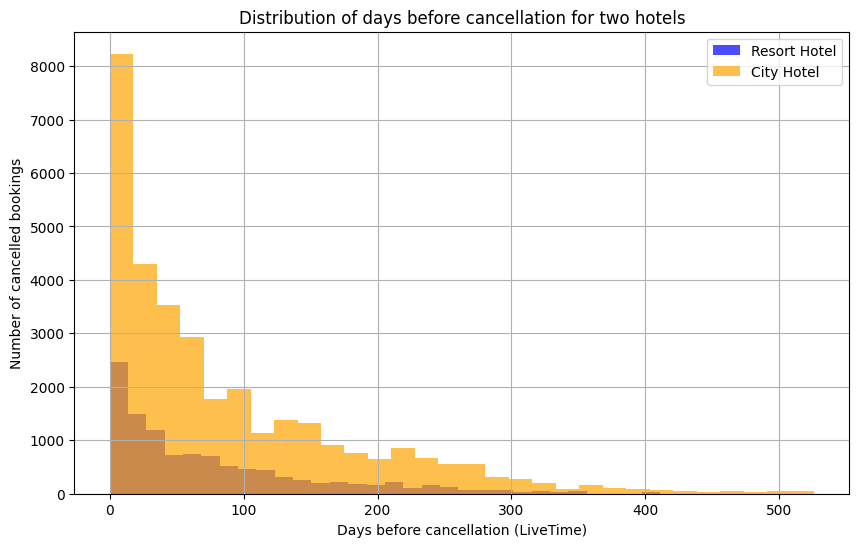

Average cancellation time for Resort Hotel: 75.84 days
Average cancellation time for City Hotel: 89.29 days


In [7]:
import matplotlib.pyplot as plt

# Filtriamo le prenotazioni cancellate
hotel1_canceled = df_h1_resort[df_h1_resort['IsCanceled'] == 1]
hotel2_canceled = df_h2_city[df_h2_city['IsCanceled'] == 1]

# Creiamo la colonna 'ArrivalDate' combinando anno, mese e giorno
hotel1_canceled['ArrivalDate'] = pd.to_datetime(hotel1_canceled[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']].astype(str).agg('-'.join, axis=1))
hotel2_canceled['ArrivalDate'] = pd.to_datetime(hotel2_canceled[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']].astype(str).agg('-'.join, axis=1))

# Convertiamo 'ReservationStatusDate' in formato datetime
hotel1_canceled['ReservationStatusDate'] = pd.to_datetime(hotel1_canceled['ReservationStatusDate'])
hotel2_canceled['ReservationStatusDate'] = pd.to_datetime(hotel2_canceled['ReservationStatusDate'])

# Calcoliamo i giorni prima della cancellazione
hotel1_canceled['DaysBeforeCancellation'] = (hotel1_canceled['ArrivalDate'] - hotel1_canceled['ReservationStatusDate']).dt.days
hotel2_canceled['DaysBeforeCancellation'] = (hotel2_canceled['ArrivalDate'] - hotel2_canceled['ReservationStatusDate']).dt.days

# Distribuzione dei tempi di cancellazione
days_before_cancellation_h1 = hotel1_canceled['DaysBeforeCancellation']
days_before_cancellation_h2 = hotel2_canceled['DaysBeforeCancellation']

# Creazione dell'istogramma per visualizzare i dati
plt.figure(figsize=(10, 6))
plt.hist(days_before_cancellation_h1, bins=30, alpha=0.7, label='Resort Hotel', color='blue')
plt.hist(days_before_cancellation_h2, bins=30, alpha=0.7, label='City Hotel', color='orange')

# Aggiunta di etichette e titolo
plt.xlabel('Days before cancellation (LiveTime)')
plt.ylabel('Number of cancelled bookings')
plt.title('Distribution of days before cancellation for two hotels')
plt.legend()

# Mostriamo il grafico
plt.grid(True)
plt.show()

# Calcolo del tempo medio di cancellazione per ciascun hotel
avg_days_before_cancellation_h1 = days_before_cancellation_h1.mean()
avg_days_before_cancellation_h2 = days_before_cancellation_h2.mean()

print(f"Average cancellation time for Resort Hotel: {avg_days_before_cancellation_h1:.2f} days")
print(f"Average cancellation time for City Hotel: {avg_days_before_cancellation_h2:.2f} days")


/var/folders/cr/n708zkvn3yl95rky5npx_kzw0000gn/T/ipykernel_93784/380895371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled['ArrivalDate'] = pd.to_datetime(df_canceled[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']].astype(str).agg('-'.join, axis=1))
/var/folders/cr/n708zkvn3yl95rky5npx_kzw0000gn/T/ipykernel_93784/380895371.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled['ReservationStatusDate'] = pd.to_datetime(df_canceled['ReservationStatusDate'])
/var/fo

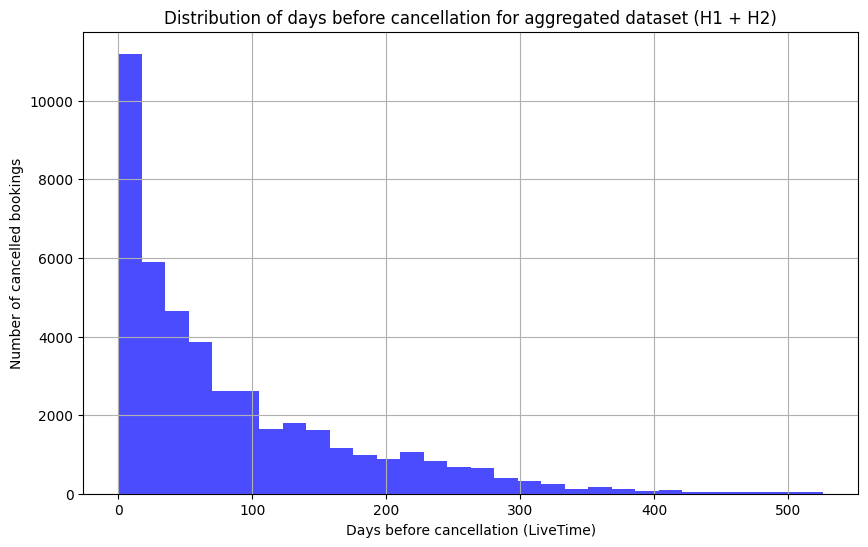

Average cancellation time for aggregated dataset (H1 + H2): 85.88 days


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumiamo che df sia già caricato con le colonne corrette

# Filtriamo le prenotazioni cancellate
df_canceled = df[df['IsCanceled'] == 1]

# Creiamo la colonna 'ArrivalDate' combinando anno, mese e giorno
df_canceled['ArrivalDate'] = pd.to_datetime(df_canceled[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']].astype(str).agg('-'.join, axis=1))

# Convertiamo 'ReservationStatusDate' in formato datetime
df_canceled['ReservationStatusDate'] = pd.to_datetime(df_canceled['ReservationStatusDate'])

# Calcoliamo i giorni prima della cancellazione
df_canceled['DaysBeforeCancellation'] = (df_canceled['ArrivalDate'] - df_canceled['ReservationStatusDate']).dt.days

# Distribuzione dei tempi di cancellazione
days_before_cancellation = df_canceled['DaysBeforeCancellation']

# Creazione dell'istogramma per visualizzare i dati
plt.figure(figsize=(10, 6))
plt.hist(days_before_cancellation, bins=30, alpha=0.7, color='blue')

# Aggiunta di etichette e titolo
plt.xlabel('Days before cancellation (LiveTime)')
plt.ylabel('Number of cancelled bookings')
plt.title('Distribution of days before cancellation for aggregated dataset (H1 + H2)')

# Mostriamo il grafico
plt.grid(True)
plt.show()

# Calcolo del tempo medio di cancellazione
avg_days_before_cancellation = days_before_cancellation.mean()

print(f"Average cancellation time for aggregated dataset (H1 + H2): {avg_days_before_cancellation:.2f} days")


<hr>

In [9]:
# drop canceled bookings
df = df.drop(df[df['IsCanceled'] == 1].index)
df_h1_resort = df_h1_resort.drop(df_h1_resort[df_h1_resort['IsCanceled'] == 1].index)
df_h2_city = df_h2_city.drop(df_h2_city[df_h2_city['IsCanceled'] == 1].index)

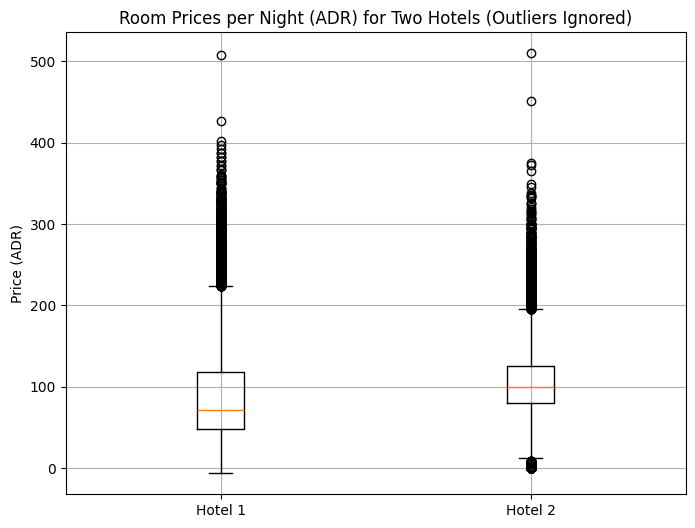

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant columns for display: ArrivalDateMonth, ArrivalDateDayOfMonth, and ADR (price per night)
h1_prices = df_h1_resort[['ArrivalDateMonth', 'ArrivalDateDayOfMonth', 'ADR']]
h2_prices = df_h2_city[['ArrivalDateMonth', 'ArrivalDateDayOfMonth', 'ADR']]

data = [h1_prices['ADR'], h2_prices['ADR']]

# Create the boxplot
# Retrying the plot creation
plt.figure(figsize=(8, 6))
plt.boxplot(data, tick_labels=['Hotel 1', 'Hotel 2'])  # 'showfliers=False' removes outliers
plt.title('Room Prices per Night (ADR) for Two Hotels (Outliers Ignored)')
plt.ylabel('Price (ADR)')
plt.grid(True)
plt.show()



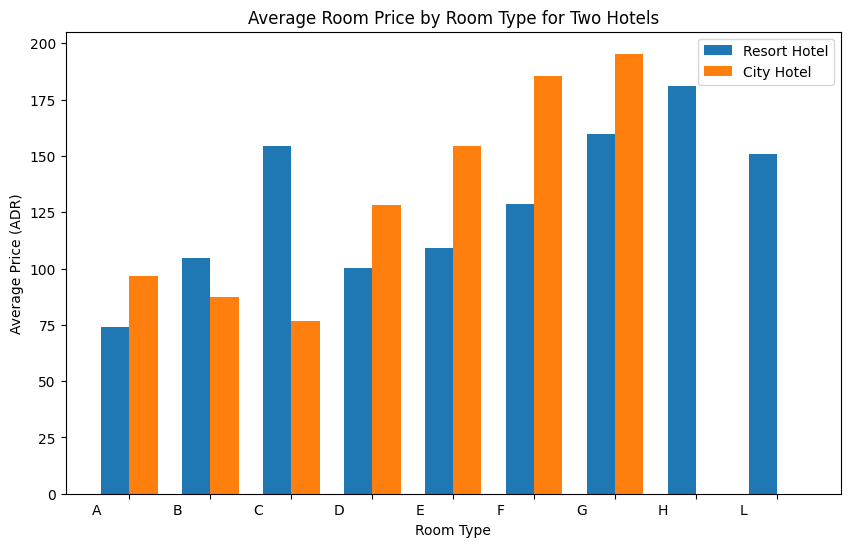

In [11]:
# Assuming 'RoomType' is the name of the column
hotel1_avg_by_room = df_h1_resort.groupby('ReservedRoomType')['ADR'].mean()
hotel2_avg_by_room = df_h2_city.groupby('ReservedRoomType')['ADR'].mean()

# Plot the results
# Set the width for the bars
bar_width = 0.35

# Align the room types by creating a union of room types from both hotels
room_types = sorted(set(hotel1_avg_by_room.index).union(set(hotel2_avg_by_room.index)))

# Fill in missing values with 0 to make both datasets have the same length
hotel1_avg_by_room = hotel1_avg_by_room.reindex(room_types, fill_value=0)
hotel2_avg_by_room = hotel2_avg_by_room.reindex(room_types, fill_value=0)

# Create an array of positions for the bars for each hotel
index = np.arange(len(hotel1_avg_by_room))

# Create the bar plot with side-by-side bars
plt.figure(figsize=(10, 6))
plt.bar(index, hotel1_avg_by_room.values, bar_width, label='Resort Hotel')
plt.bar(index + bar_width, hotel2_avg_by_room.values, bar_width, label='City Hotel')

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Average Price (ADR)')
plt.title('Average Room Price by Room Type for Two Hotels')
plt.xticks(index + bar_width / 2, hotel1_avg_by_room.index)  # Position the room types correctly
plt.legend()

plt.show()

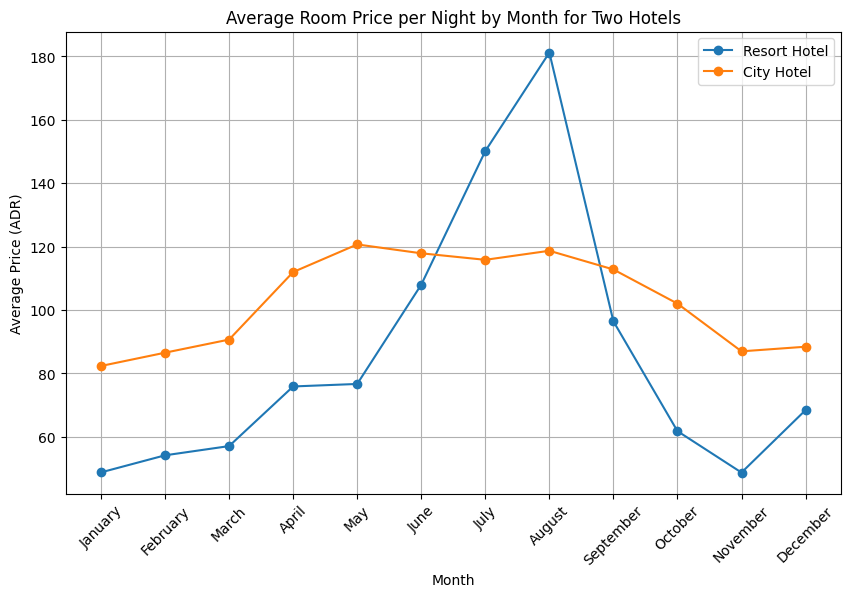

In [12]:
import matplotlib.pyplot as plt

# Group the data by month and calculate the average ADR for each month for both hotels
hotel1_avg_by_month = df_h1_resort.groupby('ArrivalDateMonth')['ADR'].mean()
hotel2_avg_by_month = df_h2_city.groupby('ArrivalDateMonth')['ADR'].mean()

# Ensure both datasets have the same order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hotel1_avg_by_month = hotel1_avg_by_month.reindex(months_order)
hotel2_avg_by_month = hotel2_avg_by_month.reindex(months_order)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(hotel1_avg_by_month.index, hotel1_avg_by_month.values, marker='o', label='Resort Hotel')
plt.plot(hotel2_avg_by_month.index, hotel2_avg_by_month.values, marker='o', label='City Hotel')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Price (ADR)')
plt.title('Average Room Price per Night by Month for Two Hotels')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


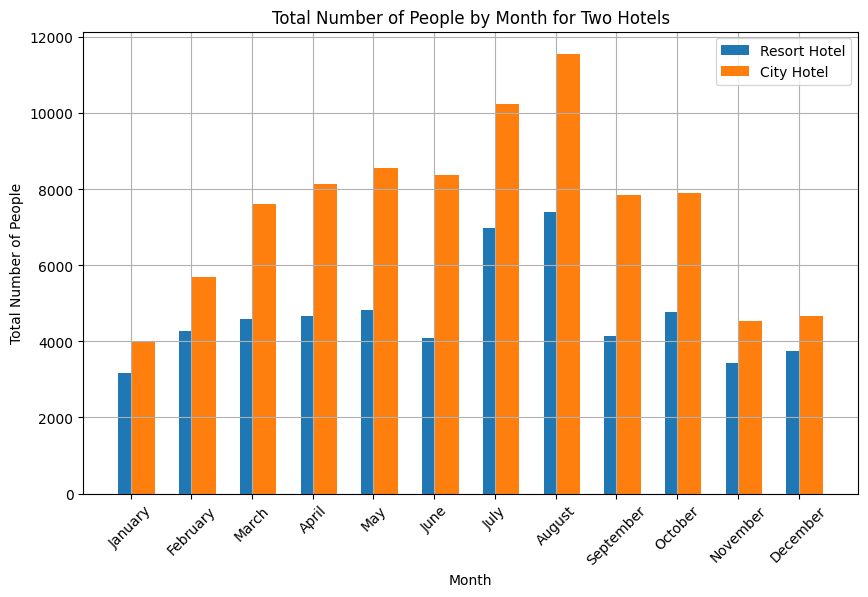

Busiest Month for Hotel 1: August with 7413 people
Busiest Month for Hotel 2: August with 11567.0 people


In [13]:
import matplotlib.pyplot as plt

# Create a new column to calculate the total number of people (adults + children)
df_h1_resort['TotalPeople'] = df_h1_resort['Adults'] + df_h1_resort['Children']
df_h2_city['TotalPeople'] = df_h2_city['Adults'] + df_h2_city['Children']

# Group the data by month and sum the total number of people (adults + children) for each month
hotel1_people_by_month = df_h1_resort.groupby('ArrivalDateMonth')['TotalPeople'].sum()
hotel2_people_by_month = df_h2_city.groupby('ArrivalDateMonth')['TotalPeople'].sum()

# Ensure both datasets have the same order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hotel1_people_by_month = hotel1_people_by_month.reindex(months_order)
hotel2_people_by_month = hotel2_people_by_month.reindex(months_order)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(hotel1_people_by_month.index, hotel1_people_by_month.values, width=0.4, label='Resort Hotel', align='center')
plt.bar(hotel2_people_by_month.index, hotel2_people_by_month.values, width=0.4, label='City Hotel', align='edge')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Number of People')
plt.title('Total Number of People by Month for Two Hotels')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Print the busiest months by total number of people
print("Busiest Month for Hotel 1:", hotel1_people_by_month.idxmax(), "with", hotel1_people_by_month.max(), "people")
print("Busiest Month for Hotel 2:", hotel2_people_by_month.idxmax(), "with", hotel2_people_by_month.max(), "people")
